# Simulasi Step Input Pada Sawah

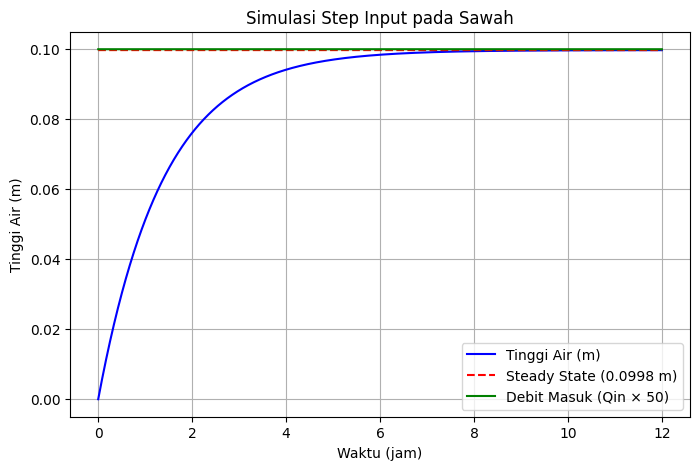

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
A = 100.0      # Luas sawah (m^2)
k = 0.02       # Koefisien aliran keluar (m^2/s)
E = 5e-6       # Kehilangan karena evaporasi (m^3/s)
h0 = 0.0       # Tinggi awal air (m)

# Input Step: Irigasi dinyalakan tiba-tiba
Qin_value = 0.002  # m^3/s (konstan)
def Qin(t): return Qin_value

# Steady-state height
h_ss = (Qin_value - E) / k

# Waktu simulasi
t = np.linspace(0, 12*3600, 2000)  # 12 jam

# Fungsi perubahan tinggi air
def dhdt(h, Qin):
    return (Qin - k*h - E) / A

def rk4_integrate(h0, Qin_func, t):
    h = np.zeros_like(t)
    h[0] = h0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        ti = t[i-1]
        k1 = dhdt(h[i-1], Qin_func(ti))
        k2 = dhdt(h[i-1] + 0.5*dt*k1, Qin_func(ti + 0.5*dt))
        k3 = dhdt(h[i-1] + 0.5*dt*k2, Qin_func(ti + 0.5*dt))
        k4 = dhdt(h[i-1] + dt*k3, Qin_func(ti + dt))
        h[i] = h[i-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        if h[i] < 0:
            h[i] = 0
    return h

# Simulasi
h = rk4_integrate(h0, Qin, t)
Qin_vals = np.array([Qin(tt) for tt in t])

# Plot
plt.figure(figsize=(8,5))
plt.plot(t/3600, h, label="Tinggi Air (m)", color="blue")
plt.plot(t/3600, [h_ss]*len(t), '--', label=f"Steady State ({h_ss:.4f} m)", color="red")
plt.plot(t/3600, Qin_vals*50, label="Debit Masuk (Qin × 50)", color="green")
plt.title("Simulasi Step Input pada Sawah")
plt.xlabel("Waktu (jam)")
plt.ylabel("Tinggi Air (m)")
plt.grid(True)
plt.legend()
plt.show()


# Simulasi Ramp Input pada Sawah Irigasi

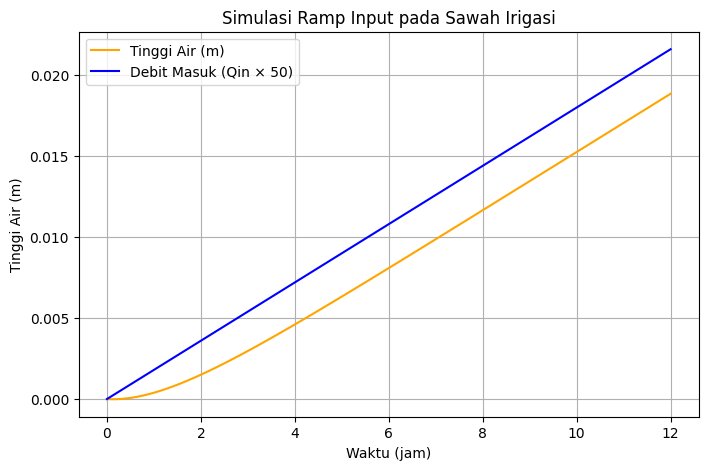

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
A, k, E = 100.0, 0.02, 5e-6
h0 = 0.0

# Debit masuk naik perlahan
def Qin(t):
    return 0.0001 * (t / 10000)  # meningkat bertahap

# Fungsi perubahan tinggi air
def dhdt(h, Qin):
    return (Qin - k*h - E) / A

def rk4_integrate(h0, Qin_func, t):
    h = np.zeros_like(t)
    h[0] = h0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        ti = t[i-1]
        k1 = dhdt(h[i-1], Qin_func(ti))
        k2 = dhdt(h[i-1] + 0.5*dt*k1, Qin_func(ti + 0.5*dt))
        k3 = dhdt(h[i-1] + 0.5*dt*k2, Qin_func(ti + 0.5*dt))
        k4 = dhdt(h[i-1] + dt*k3, Qin_func(ti + dt))
        h[i] = h[i-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return h

# Simulasi
t = np.linspace(0, 12*3600, 2000)
h = rk4_integrate(h0, Qin, t)
Qin_vals = np.array([Qin(tt) for tt in t])

# Plot
plt.figure(figsize=(8,5))
plt.plot(t/3600, h, 'orange', label='Tinggi Air (m)')
plt.plot(t/3600, Qin_vals*50, 'blue', label='Debit Masuk (Qin × 50)')
plt.title('Simulasi Ramp Input pada Sawah Irigasi')
plt.xlabel('Waktu (jam)')
plt.ylabel('Tinggi Air (m)')
plt.legend()
plt.grid(True)
plt.show()


# Simulasi Sinusoidal Input pada Sawah Irigasi

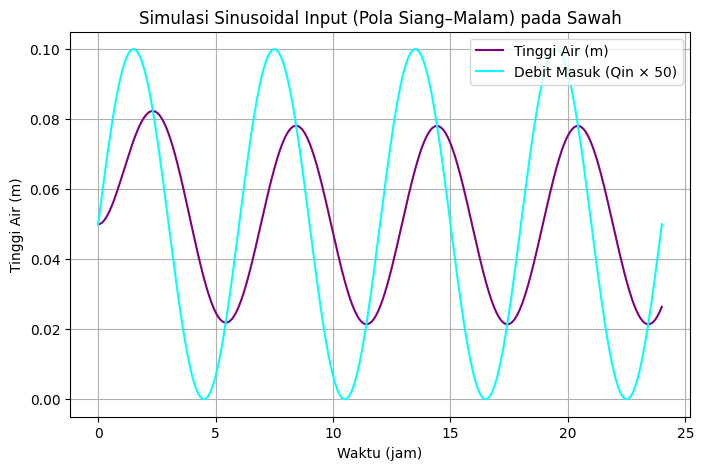

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
A, k, E = 100.0, 0.02, 5e-6
h0 = 0.05

# Debit sinusoidal (periode 6 jam)
def Qin(t):
    return 0.001 + 0.001 * np.sin(2 * np.pi * t / (6*3600))

# Fungsi perubahan tinggi air
def dhdt(h, Qin):
    return (Qin - k*h - E) / A

# RK4 integrator
def rk4_integrate(h0, Qin_func, t):
    h = np.zeros_like(t)
    h[0] = h0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        ti = t[i-1]
        k1 = dhdt(h[i-1], Qin_func(ti))
        k2 = dhdt(h[i-1] + 0.5*dt*k1, Qin_func(ti + 0.5*dt))
        k3 = dhdt(h[i-1] + 0.5*dt*k2, Qin_func(ti + 0.5*dt))
        k4 = dhdt(h[i-1] + dt*k3, Qin_func(ti + dt))
        h[i] = h[i-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return h

# Simulasi
t = np.linspace(0, 24*3600, 3000)
h = rk4_integrate(h0, Qin, t)
Qin_vals = np.array([Qin(tt) for tt in t])

# Plot
plt.figure(figsize=(8,5))
plt.plot(t/3600, h, 'purple', label='Tinggi Air (m)')
plt.plot(t/3600, Qin_vals*50, 'cyan', label='Debit Masuk (Qin × 50)')
plt.title('Simulasi Sinusoidal Input (Pola Siang–Malam) pada Sawah')
plt.xlabel('Waktu (jam)')
plt.ylabel('Tinggi Air (m)')
plt.legend()
plt.grid(True)
plt.show()

# Simulasi Impulse Input pada Sawah Irigasi

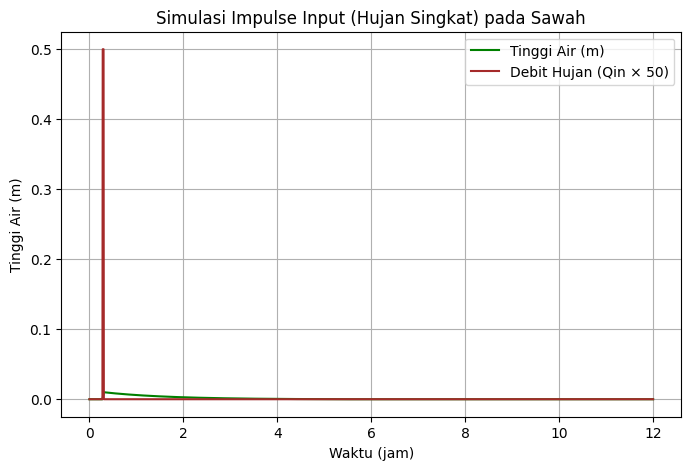

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
A, k, E = 100.0, 0.02, 5e-6
h0 = 0.0

# Debit masuk: hujan sesaat
def Qin(t):
    if 1000 <= t <= 1100:  # hujan 100 detik
        return 0.01
    else:
        return 0.0

# Fungsi perubahan tinggi air
def dhdt(h, Qin):
    return (Qin - k*h - E) / A

# RK4 integrator
def rk4_integrate(h0, Qin_func, t):
    h = np.zeros_like(t)
    h[0] = h0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        ti = t[i-1]
        k1 = dhdt(h[i-1], Qin_func(ti))
        k2 = dhdt(h[i-1] + 0.5*dt*k1, Qin_func(ti + 0.5*dt))
        k3 = dhdt(h[i-1] + 0.5*dt*k2, Qin_func(ti + 0.5*dt))
        k4 = dhdt(h[i-1] + dt*k3, Qin_func(ti + dt))
        h[i] = h[i-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        if h[i] < 0: h[i] = 0
    return h

# Simulasi
t = np.linspace(0, 12*3600, 2000)
h = rk4_integrate(h0, Qin, t)
Qin_vals = np.array([Qin(tt) for tt in t])

# Plot
plt.figure(figsize=(8,5))
plt.plot(t/3600, h, 'g', label='Tinggi Air (m)')
plt.plot(t/3600, Qin_vals*50, 'brown', label='Debit Hujan (Qin × 50)')
plt.title('Simulasi Impulse Input (Hujan Singkat) pada Sawah')
plt.xlabel('Waktu (jam)')
plt.ylabel('Tinggi Air (m)')
plt.legend()
plt.grid(True)
plt.show()